In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.dates import DateFormatter
import seaborn as sns

In [38]:
# Define 'df' as the earthquake data set.
df = pd.read_csv('D:/TDA/Earthquake/all_month.csv')
df.head(10)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-01-09T02:07:20.070Z,38.786335,-122.747330,1.7900,1.33,md,24.0,81.00,0.008847,0.0300,...,2025-01-09T02:08:57.249Z,"1 km NE of The Geysers, CA",earthquake,0.23,0.370000,0.140,25.0,automatic,nc,nc
1,2025-01-09T02:06:16.540Z,38.814335,-122.830498,1.2400,0.75,md,9.0,85.00,0.005555,0.0100,...,2025-01-09T02:07:52.268Z,"8 km NW of The Geysers, CA",earthquake,0.31,0.820000,0.450,10.0,automatic,nc,nc
2,2025-01-09T01:46:04.204Z,31.646000,-104.368000,4.5325,1.50,ml,17.0,71.00,0.100000,0.3000,...,2025-01-09T01:50:33.437Z,"58 km S of Whites City, New Mexico",earthquake,0.00,1.372393,0.200,13.0,automatic,tx,tx
3,2025-01-09T01:41:13.130Z,33.235667,-116.663000,11.7700,0.72,ml,30.0,52.00,0.080260,0.1600,...,2025-01-09T01:45:42.274Z,"6 km SSW of Warner Springs, CA",earthquake,0.21,0.550000,0.121,20.0,automatic,ci,ci
4,2025-01-09T01:37:32.210Z,34.024333,-117.589333,2.8100,1.32,ml,23.0,104.00,0.017350,0.1600,...,2025-01-09T01:42:38.440Z,"5 km SE of Ontario, CA",earthquake,0.31,0.350000,0.149,30.0,automatic,ci,ci
5,2025-01-09T01:28:25.430Z,38.831501,-122.818336,2.0800,0.75,md,6.0,100.00,0.010350,0.0100,...,2025-01-09T01:30:02.019Z,"8 km NNW of The Geysers, CA",earthquake,1.15,4.140000,0.160,8.0,automatic,nc,nc
6,2025-01-09T01:19:47.490Z,33.047500,-116.419167,6.7100,0.99,ml,45.0,50.00,0.033740,0.1900,...,2025-01-09T01:24:19.314Z,"17 km ESE of Julian, CA",earthquake,0.18,0.380000,0.174,26.0,automatic,ci,ci
7,2025-01-09T00:46:42.518Z,38.508900,-118.480500,5.6000,1.60,ml,8.0,131.87,0.124000,0.1177,...,2025-01-09T00:49:04.409Z,"12 km E of Hawthorne, Nevada",earthquake,NaN,1.700000,0.390,5.0,automatic,nn,nn
8,2025-01-09T00:34:16.560Z,32.602300,88.389500,10.0000,4.30,mb,29.0,142.00,12.796000,0.7700,...,2025-01-09T00:53:24.040Z,western Xizang,earthquake,13.94,1.935000,0.094,32.0,reviewed,us,us
9,2025-01-09T00:31:48.790Z,38.759834,-122.794998,4.9000,0.75,md,8.0,220.00,0.029140,0.1400,...,2025-01-09T00:33:26.548Z,"4 km WSW of The Geysers, CA",earthquake,1.73,2.700000,0.060,7.0,automatic,nc,nc


In [39]:
# Find each earthquake source.
type = df['type'].unique()

print(type)

['earthquake' 'quarry blast' 'explosion' 'ice quake' 'mine collapse']


In [40]:
# This code finds the last word in the 'place' column to accurately filter out where each earthquake happended.

df['last_word'] = df['place'].str.split().str[-1]

# Count occurrences of each last word
last_word_counts = df['last_word'].value_counts()

# Display the result
print(last_word_counts)

last_word
CA            2650
Alaska        2572
Nevada        1065
Hawaii         365
Texas          337
              ... 
Congo            1
Kyrgyzstan       1
Kansas           1
Ocean            1
Kosovo           1
Name: count, Length: 101, dtype: int64


In [41]:
# This code cleans the data set and creates a new one with locations only in the USA.  
df = pd.read_csv('D:/TDA/Earthquake/all_month.csv')

# Define the list of USA locations.
usa_locations = ['CA', 'Alaska', 'Nevada', 'Hawaii', 'Texas', 'Montana', 'Utah', 'New Mexico', 'Oklahoma', 'Idaho', 'Oregon', 'California', 'Wyoming', 'Missouri', 'Tennessee', 'Louisiana']

# Filter the dataframe to include only rows where 'place' ends with the US locations
filtered_df = df[df['place'].str.endswith(tuple(usa_locations))]

# Save the filtered data to a new CSV file
filtered_df.to_csv('D:/TDA/Earthquake/filtered_usa_locations2.csv', index=False)


In [42]:
# This code removes any quake source that isn't an earthquake such as 'explostions', 'mine collapses' e.t.c

df = pd.read_csv('D:/TDA/Earthquake/filtered_usa_locations.csv')

# Define the list of USA locations you want to include
quaqe_types = ['earthquake']

# Filter the dataframe to include only rows where 'place' ends with the specified locations
filtered_df = df[df['type'].str.endswith(tuple(quaqe_types))]

# Save the filtered data to a new CSV file
filtered_df.to_csv('D:/TDA/Earthquake/USA_earthquakes3.csv', index=False)


In [43]:
# This code eplaces all instances of 'CA' with 'California' so that they don't turn up as two separate locations.

df = pd.read_csv('D:/TDA/Earthquake/USA_earthquakes.csv')

# Function to replace 'CA' with 'California' if it's the last word
def replace_ca(place):
    words = place.split()
    if words[-1] == 'CA':
        words[-1] = 'California'
    return ' '.join(words)

# Apply the function to the 'place' column
df['place'] = df['place'].apply(replace_ca)

# Save the updated dataset
df.to_csv('D:/TDA/Earthquake/USA_earthquakes_updated.csv', index=False)

# Print the updated last word counts
df['last_word'] = df['place'].str.split().str[-1]
last_word_counts = df['last_word'].value_counts()
print(last_word_counts)

last_word
California    2661
Alaska        2568
Nevada        1059
Hawaii         365
Texas          337
Utah           250
Montana        242
Mexico         134
Idaho          101
Oklahoma        95
Oregon          45
Wyoming         28
Missouri        11
Tennessee        9
Louisiana        6
Name: count, dtype: int64


In [44]:
# his time I add a 'State' column that only lists the state.

df = pd.read_csv('D:/TDA/Earthquake/USA_earthquakes_updated.csv')

# Extract the last word (state) from the 'place' column
df['State'] = df['place'].str.split().str[-1]

# Save the updated dataset with the new 'State' column
df.to_csv('D:/TDA/Earthquake/USA_earthquakes_with_states.csv', index=False)

# Print the first few rows to verify the changes
print(df[['place', 'State']].head())

# Print unique states to check the result
print("\nUnique states:")
print(df['State'].unique())

                                    place       State
0      1 km NE of The Geysers, California  California
1      8 km NW of The Geysers, California  California
2      58 km S of Whites City, New Mexico      Mexico
3  6 km SSW of Warner Springs, California  California
4          5 km SE of Ontario, California  California

Unique states:
['California' 'Mexico' 'Nevada' 'Texas' 'Alaska' 'Hawaii' 'Oklahoma'
 'Utah' 'Wyoming' 'Idaho' 'Montana' 'Oregon' 'Louisiana' 'Missouri'
 'Tennessee']


In [45]:
# One  final edit to our dataset, New Mexico appears as just 'Mexico' so I joined 'New' to every insance of it in the 'State' column. 

df = pd.read_csv('D:/TDA/Earthquake/USA_earthquakes_with_states.csv')

# Replace 'Mexico' with 'New Mexico' in the 'States' column
df['State'] = df['State'].replace('Mexico', 'New Mexico')

# Save the updated dataset
df.to_csv('D:/TDA/Earthquake/USA_earthquakes_with_states2.csv', index=False)

# Print the unique states to verify the change
print(df['State'].unique())

['California' 'New Mexico' 'Nevada' 'Texas' 'Alaska' 'Hawaii' 'Oklahoma'
 'Utah' 'Wyoming' 'Idaho' 'Montana' 'Oregon' 'Louisiana' 'Missouri'
 'Tennessee']


D:\Temp\ipykernel_18520\4087319778.py:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['week'] = df['time'].dt.to_period('W').apply(lambda r: r.start_time)


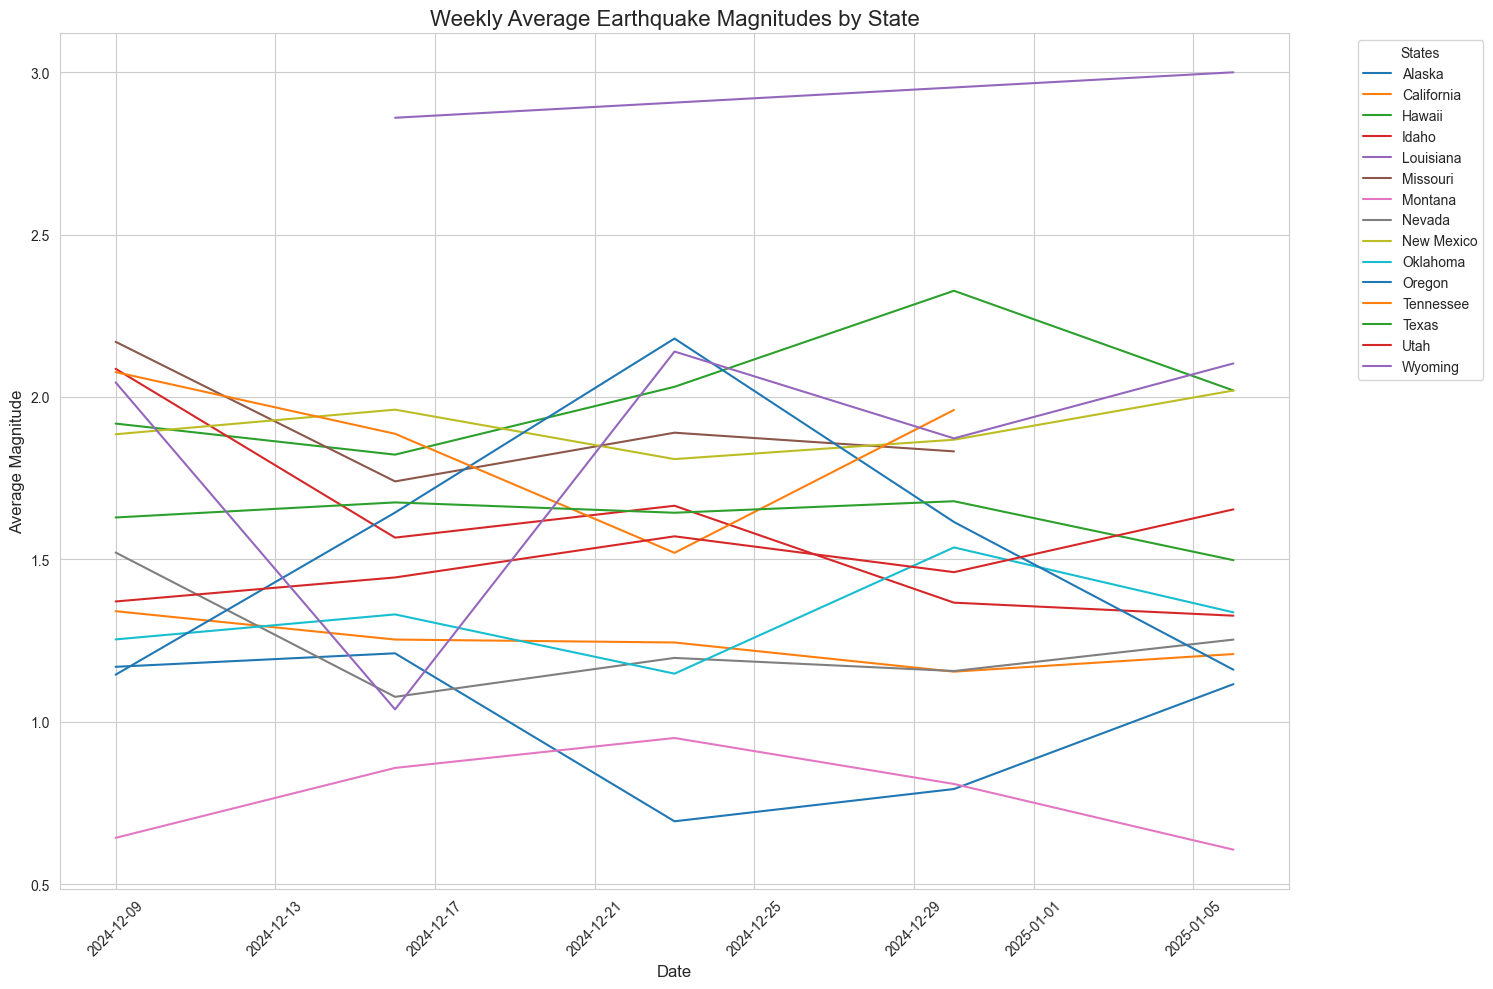

In [46]:
# This is a graph displaying weekly average earthquakes in one chart, it was too messy so I left it out of the presentation.

df = pd.read_csv('D:/TDA/Earthquake/USA_earthquakes_with_states2.csv')

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Create a weekly timestamp and calculate weekly average magnitudes
df['week'] = df['time'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_data = df.groupby(['State', 'week'])['mag'].mean().reset_index()

# Create the plot
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")

# Plot a line for each state
for state in weekly_data['State'].unique():
    state_data = weekly_data[weekly_data['State'] == state]
    plt.plot(state_data['week'], state_data['mag'], label=state, linewidth=1.5)

# Customize the plot
plt.title('Weekly Average Earthquake Magnitudes by State', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Magnitude', fontsize=12)
plt.legend(title='States', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# Format the date on the x-axis
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Save the plot
plt.savefig('D:/TDA/Earthquake/weekly_earthquake_magnitudes_by_state.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


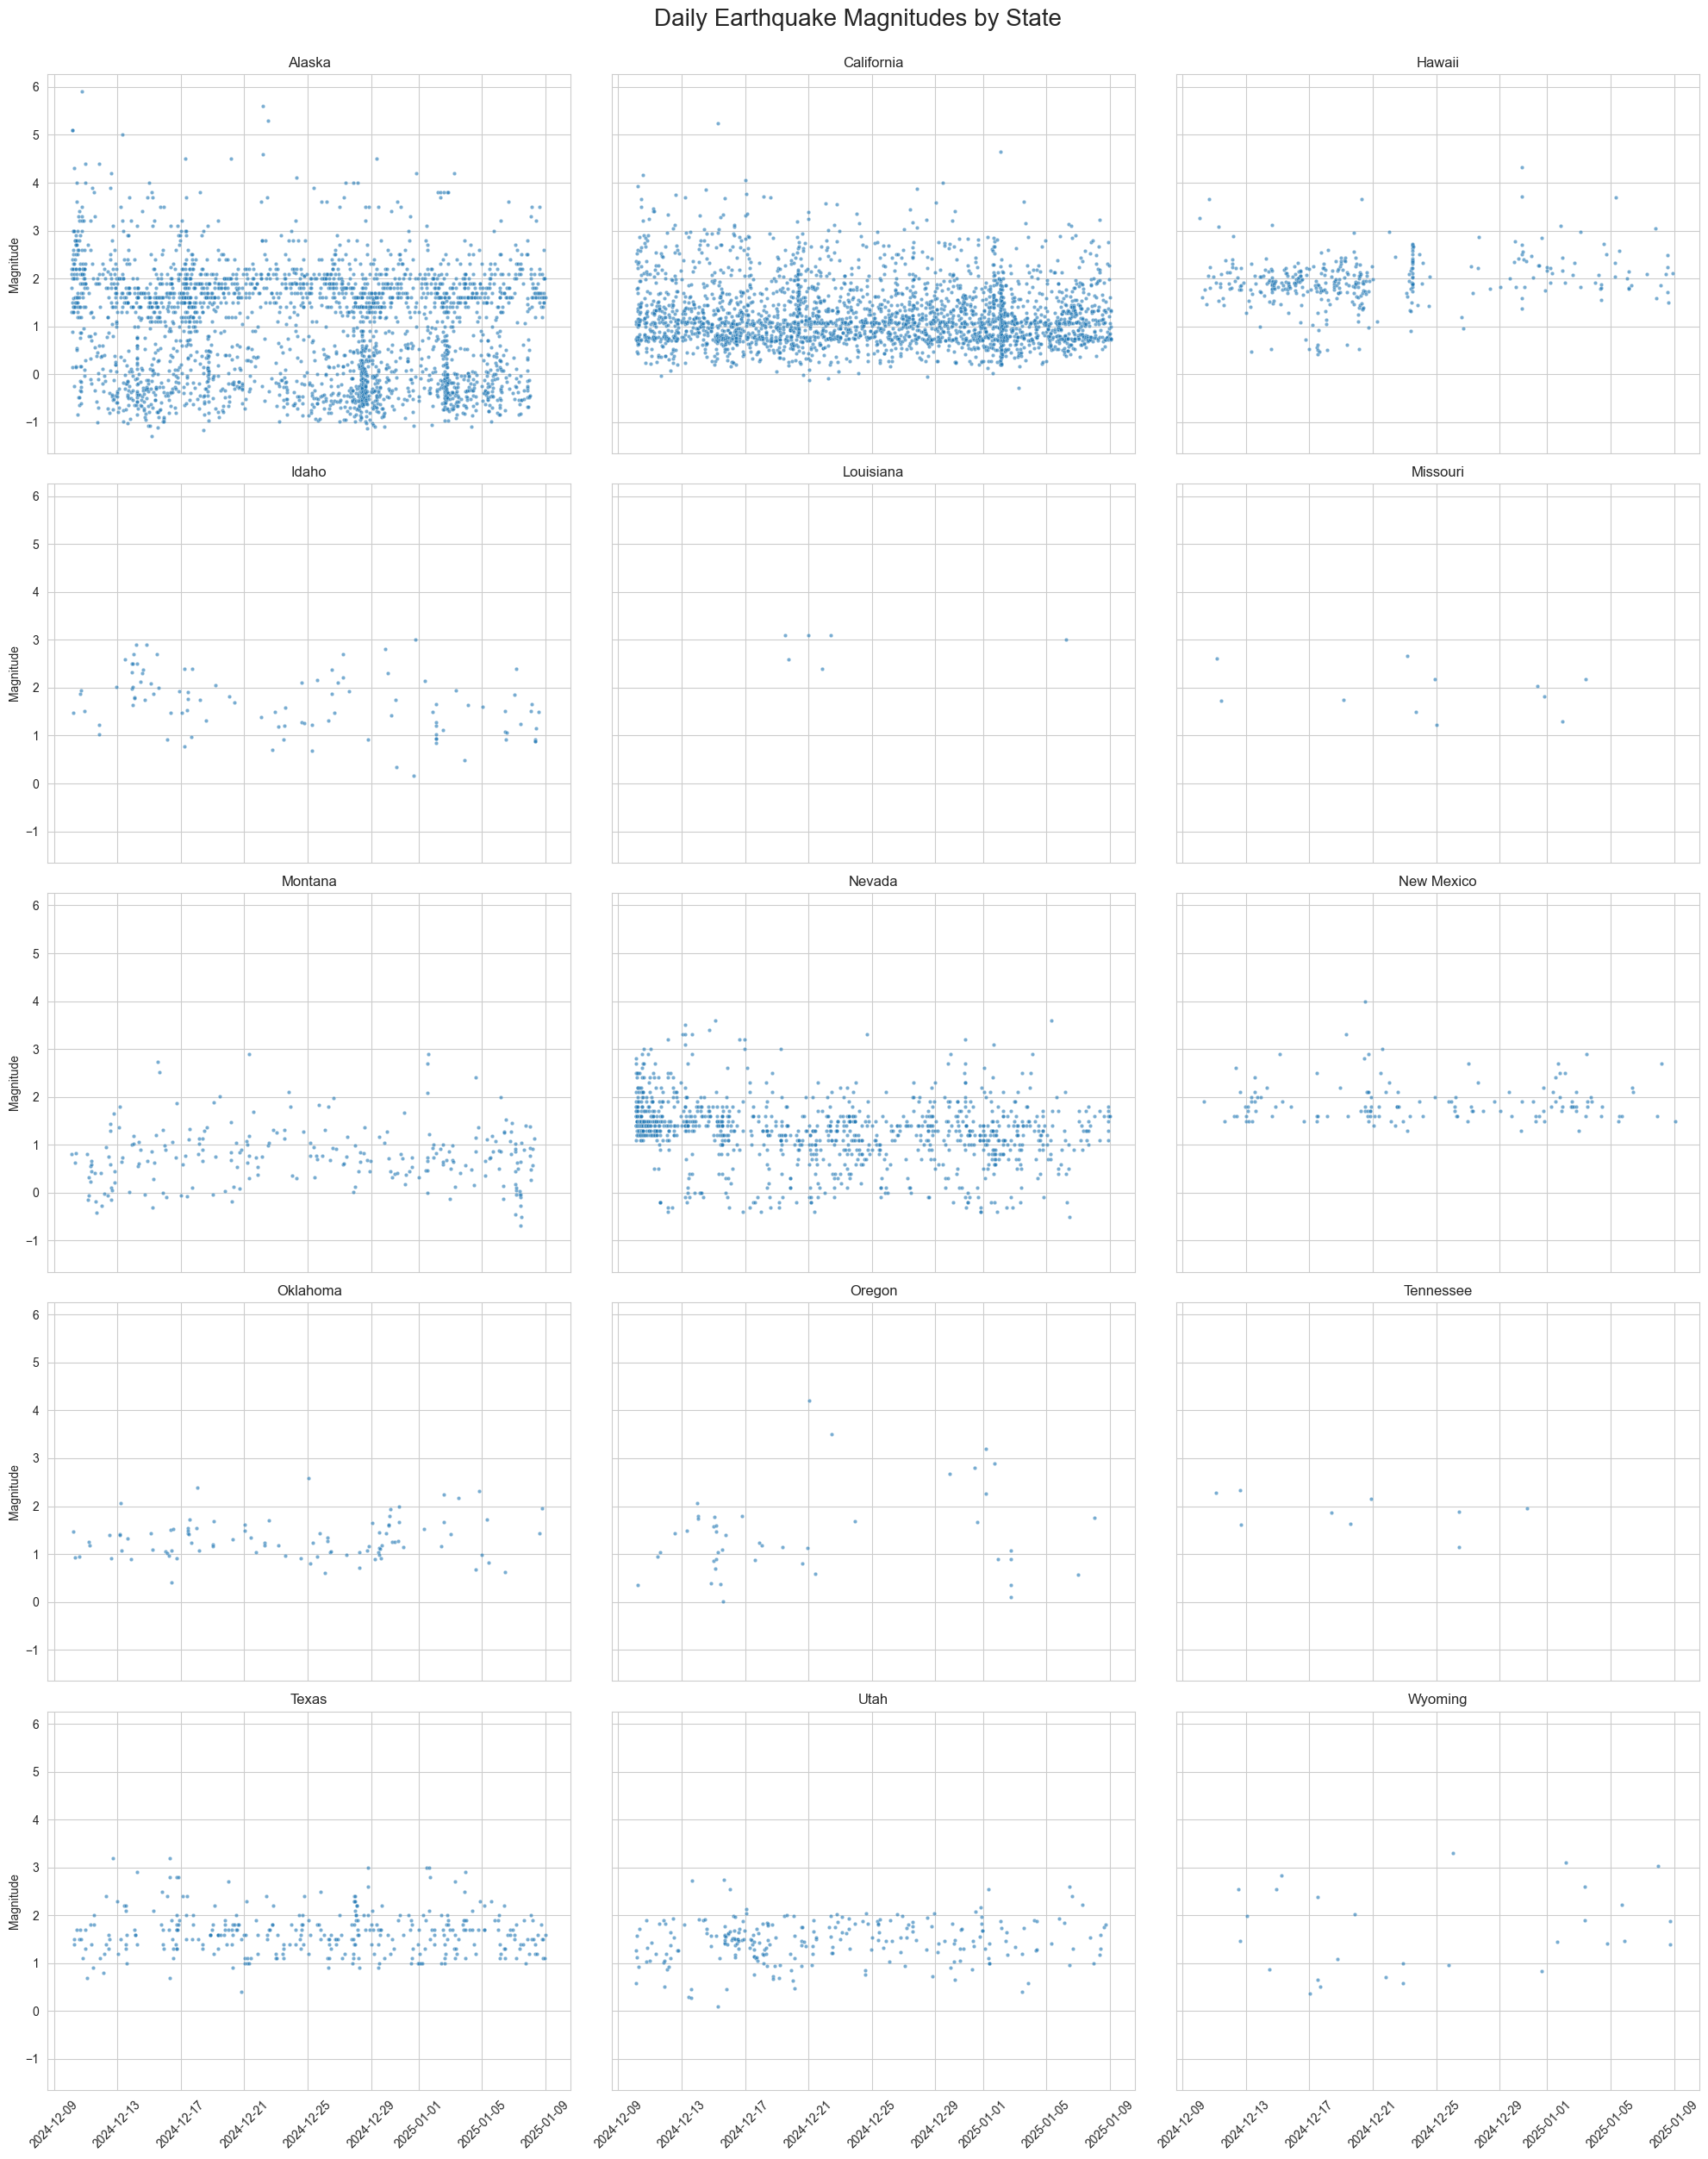

In [47]:
# This is a small multiple scatte chart displaying daily average earthquakes per state in alphabetical order.

df = pd.read_csv('D:/TDA/Earthquake/USA_earthquakes_with_states2.csv')

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Sort the dataframe by time
df = df.sort_values('time')

# Get unique states
states = sorted(df['State'].unique())

# Calculate grid dimensions
n = len(states)
cols = 3
rows = -(-n // cols)  # Ceiling division

# Create the plot
fig, axes = plt.subplots(rows, cols, figsize=(20, 5*rows), sharex=True, sharey=True)
fig.suptitle('Daily Earthquake Magnitudes by State', fontsize=20, y=1)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot for each state
for i, state in enumerate(states):
    state_data = df[df['State'] == state]
    ax = axes[i]
    sns.scatterplot(data=state_data, x='time', y='mag', ax=ax, s=10, alpha=0.6)
    ax.set_title(state)
    ax.set_xlabel('')
    ax.set_ylabel('Magnitude')
    ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    ax.tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('D:/TDA/Earthquake/small_multiples_daily_earthquake_magnitudes.png', dpi=300, bbox_inches='tight')
plt.show()

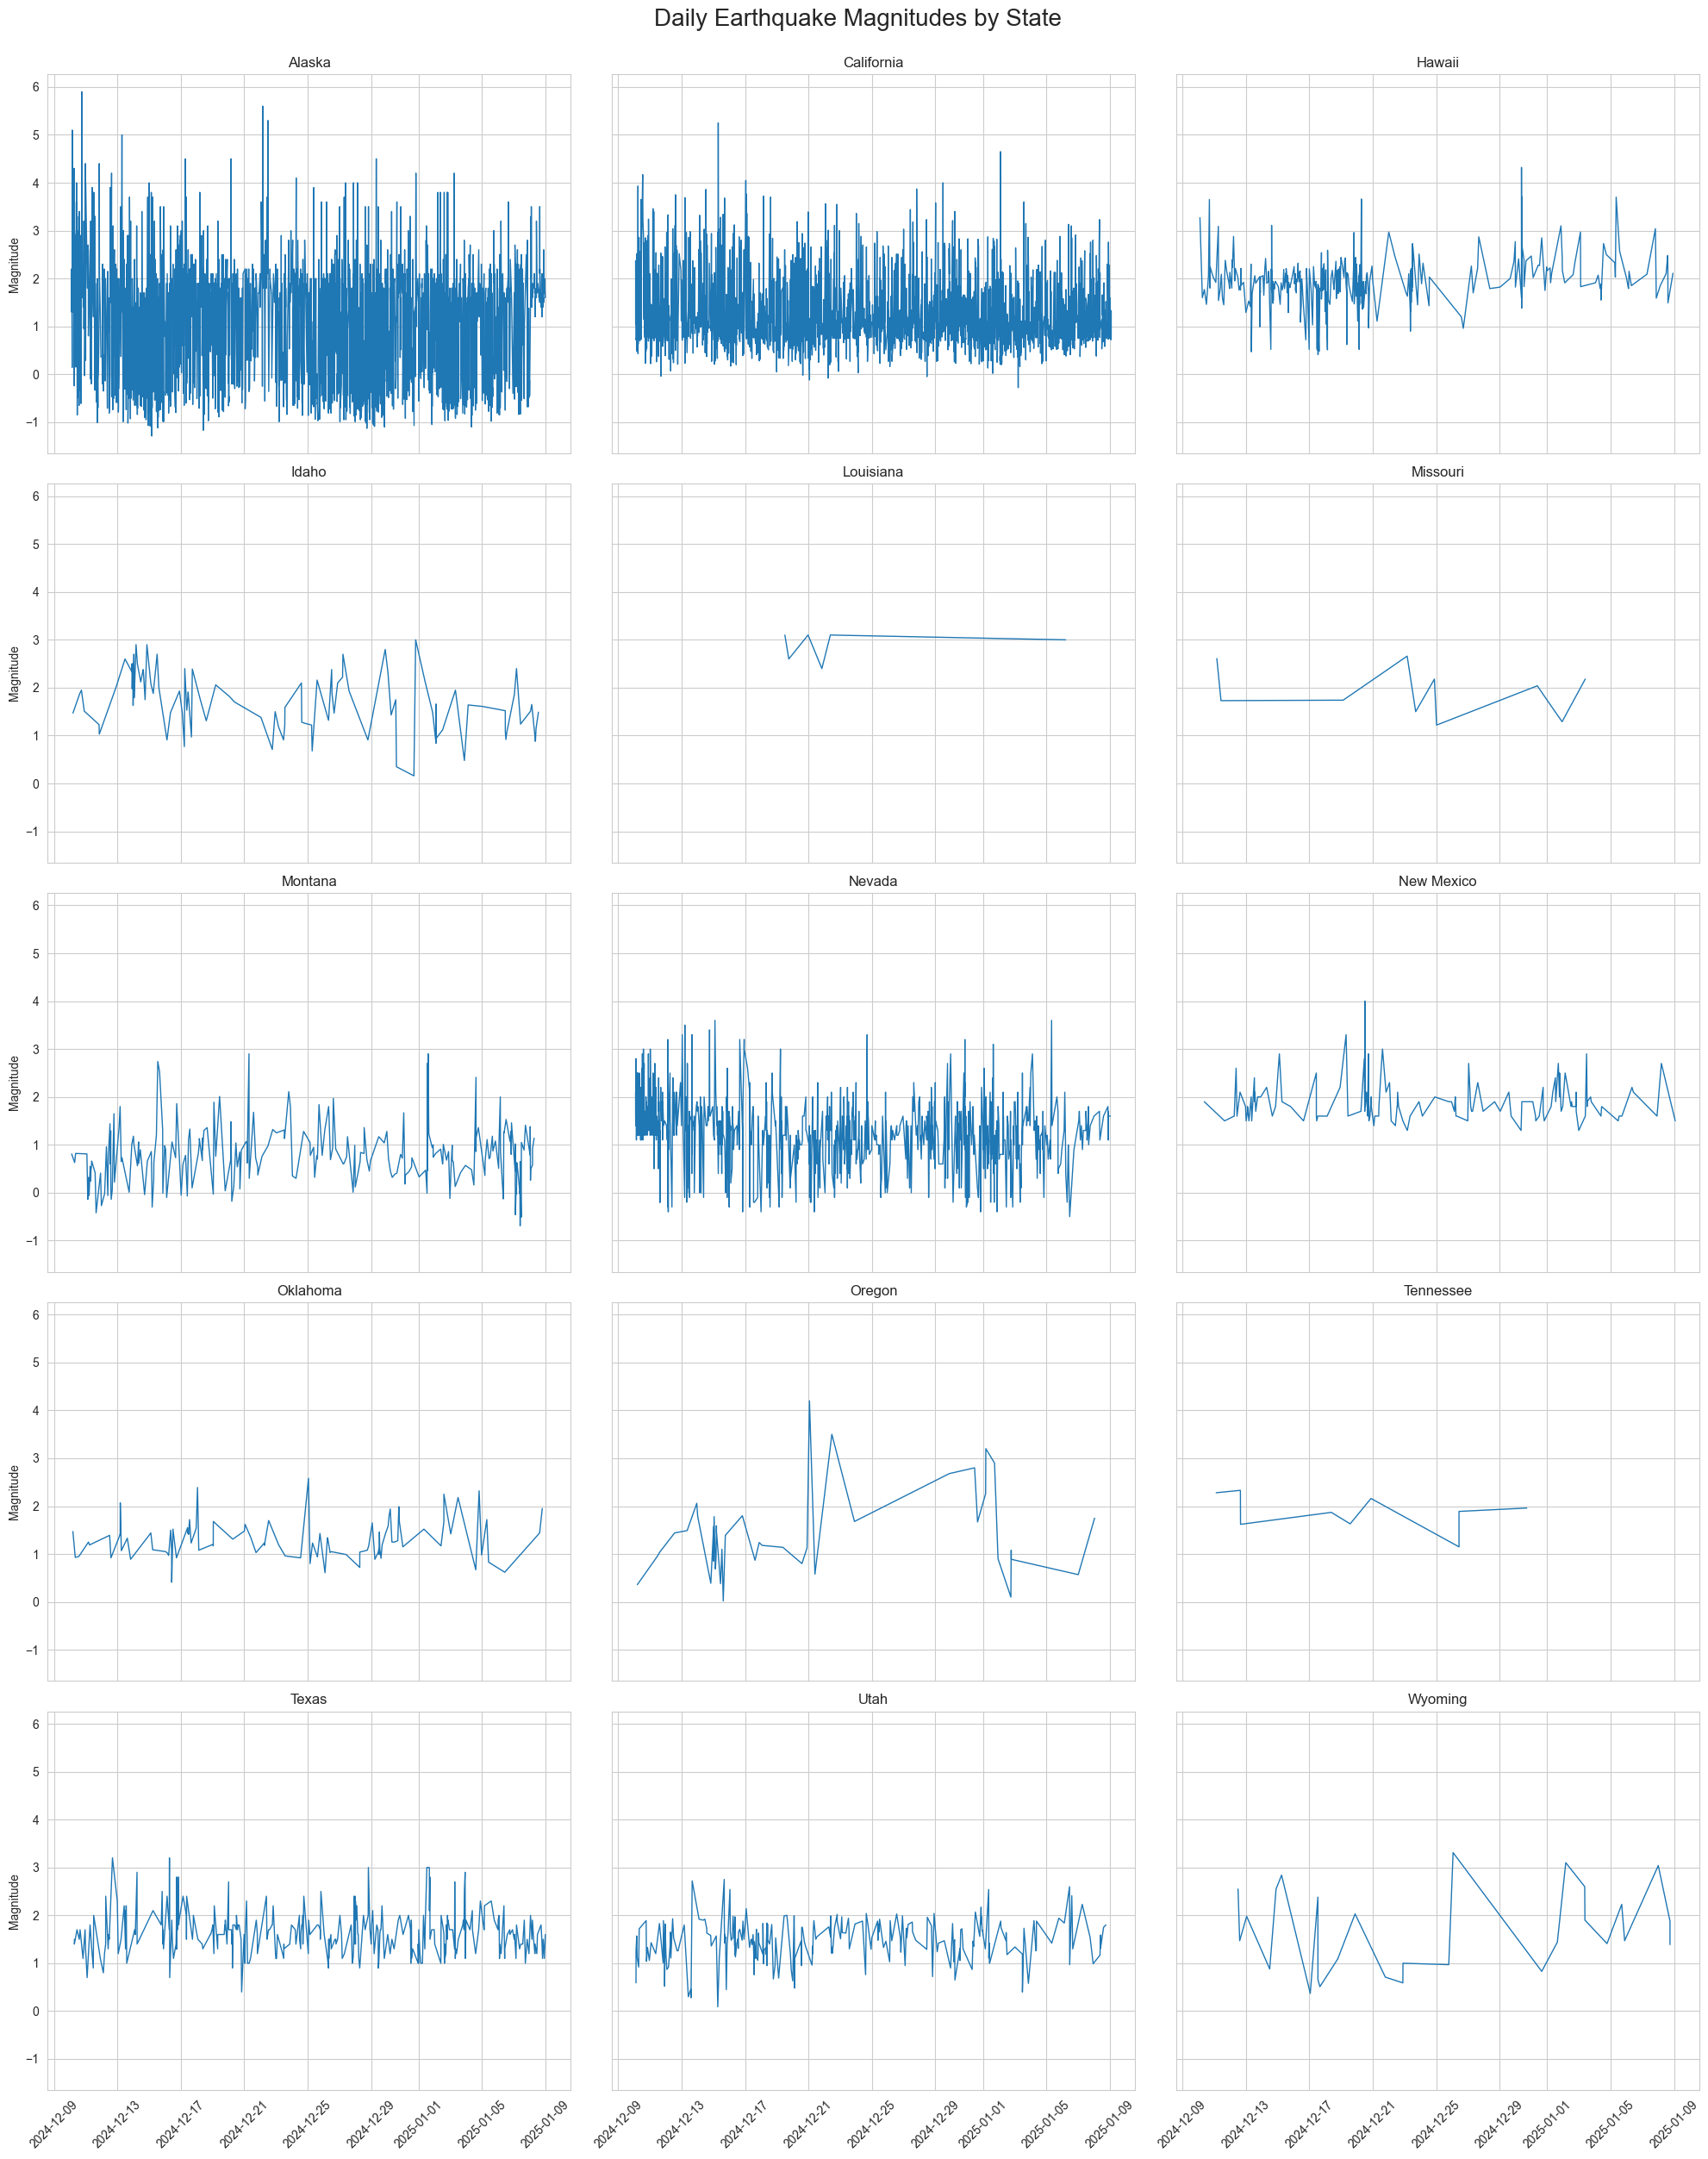

In [48]:
# This is a small multiple line chart displaying daily average earthquakes per state in alphabetical order.

df = pd.read_csv('D:/TDA/Earthquake/USA_earthquakes_with_states2.csv')

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Sort the dataframe by time
df = df.sort_values('time')

# Get unique states
states = sorted(df['State'].unique())

# Calculate grid dimensions
n = len(states)
cols = 3
rows = -(-n // cols)  # Ceiling division

# Create the plot
fig, axes = plt.subplots(rows, cols, figsize=(20, 5*rows), sharex=True, sharey=True)
fig.suptitle('Daily Earthquake Magnitudes by State', fontsize=20,  y=1)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot for each state
for i, state in enumerate(states):
    state_data = df[df['State'] == state]
    ax = axes[i]
    sns.lineplot(data=state_data, x='time', y='mag', ax=ax, linewidth=1)
    ax.set_title(state)
    ax.set_xlabel('')
    ax.set_ylabel('Magnitude' if i % cols == 0 else '')
    ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    ax.tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('D:/TDA/Earthquake/small_multiples_daily_earthquake_magnitudes_line.png', dpi=300, bbox_inches='tight')
plt.show()

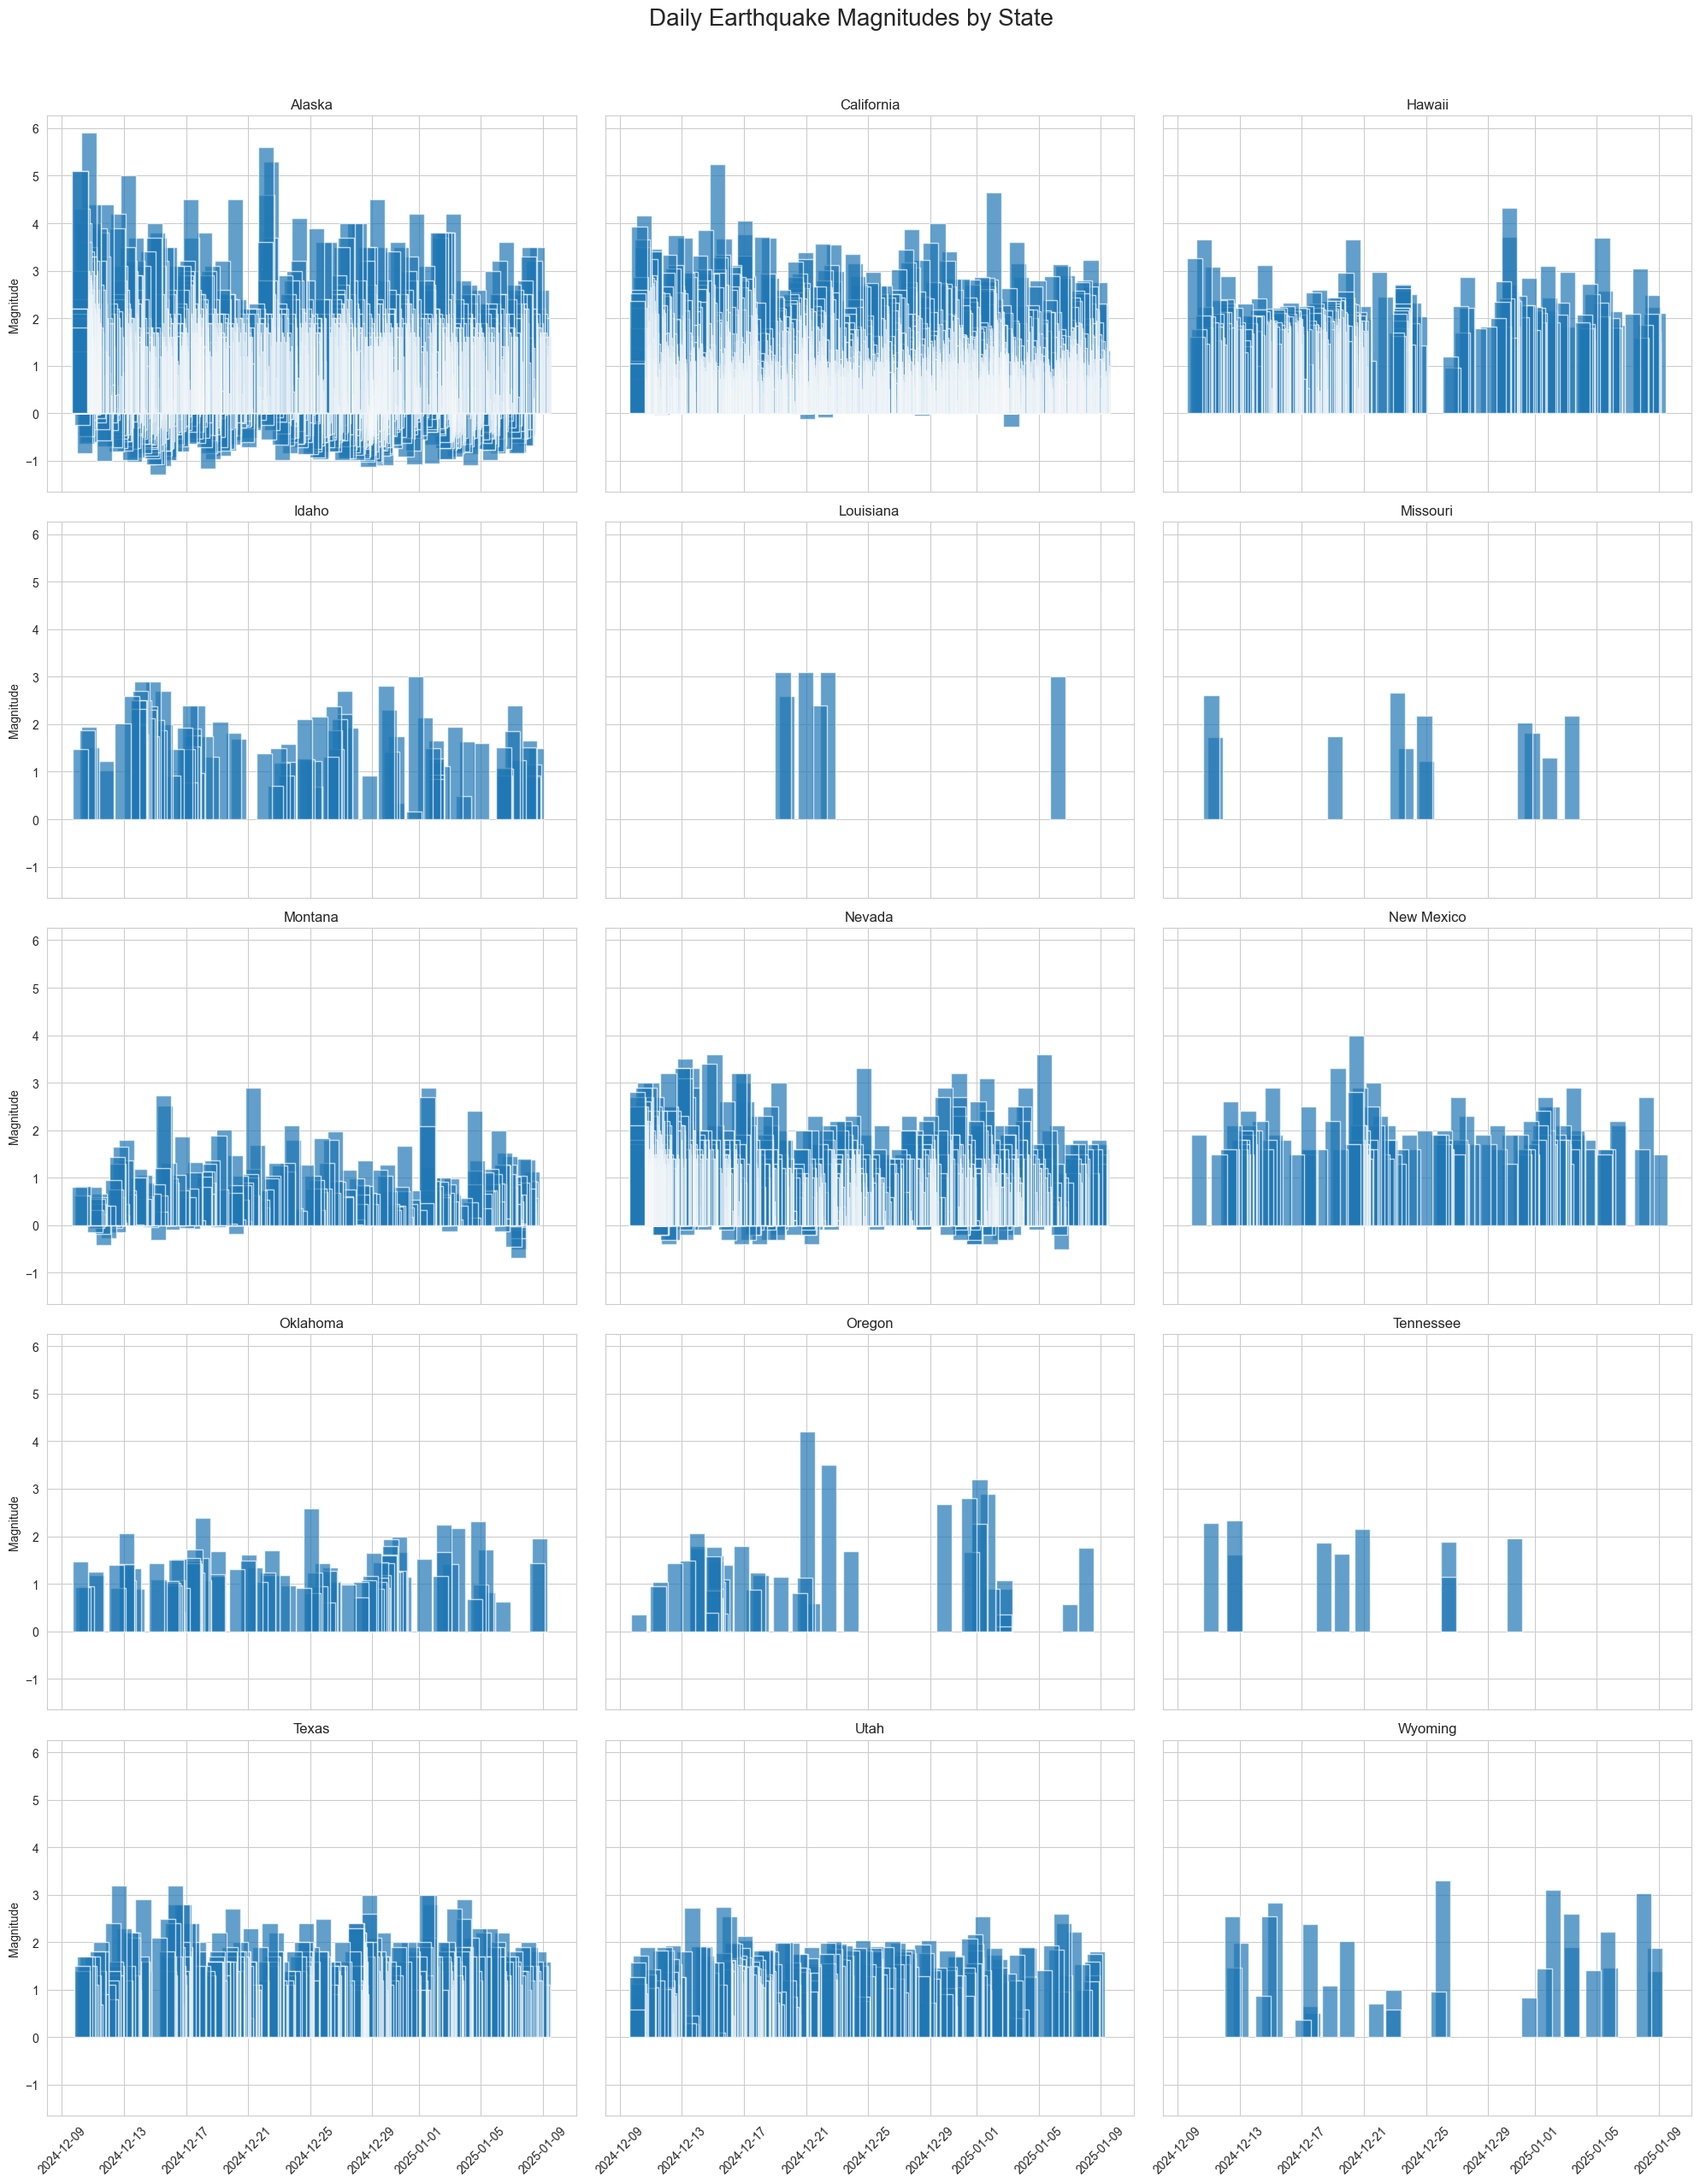

In [49]:
# This is a small multiple bar chart displaying daily average earthquakes per state in alphabetical order. It was too messy so I didn't include it in the presentation.

df = pd.read_csv('D:/TDA/Earthquake/USA_earthquakes_with_states2.csv')

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Get unique states and sort them alphabetically
states = sorted(df['State'].unique())

# Calculate grid dimensions
cols = 3
rows = -(-len(states) // cols)  # Ceiling division

# Create the plot
fig, axes = plt.subplots(rows, cols, figsize=(20, 5*rows), sharex=True, sharey=True)
fig.suptitle('Daily Earthquake Magnitudes by State', fontsize=20, y=1.02)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot for each state
for i, state in enumerate(states):
    state_data = df[df['State'] == state]
    ax = axes[i]
    ax.bar(state_data['time'], state_data['mag'], width=1, alpha=0.7)
    ax.set_title(state)
    ax.set_xlabel('')
    ax.set_ylabel('Magnitude' if i % cols == 0 else '')
    ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    ax.tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('D:/TDA/Earthquake/small_multiples_daily_earthquake_magnitudes_bar.png', dpi=300, bbox_inches='tight')
plt.show()

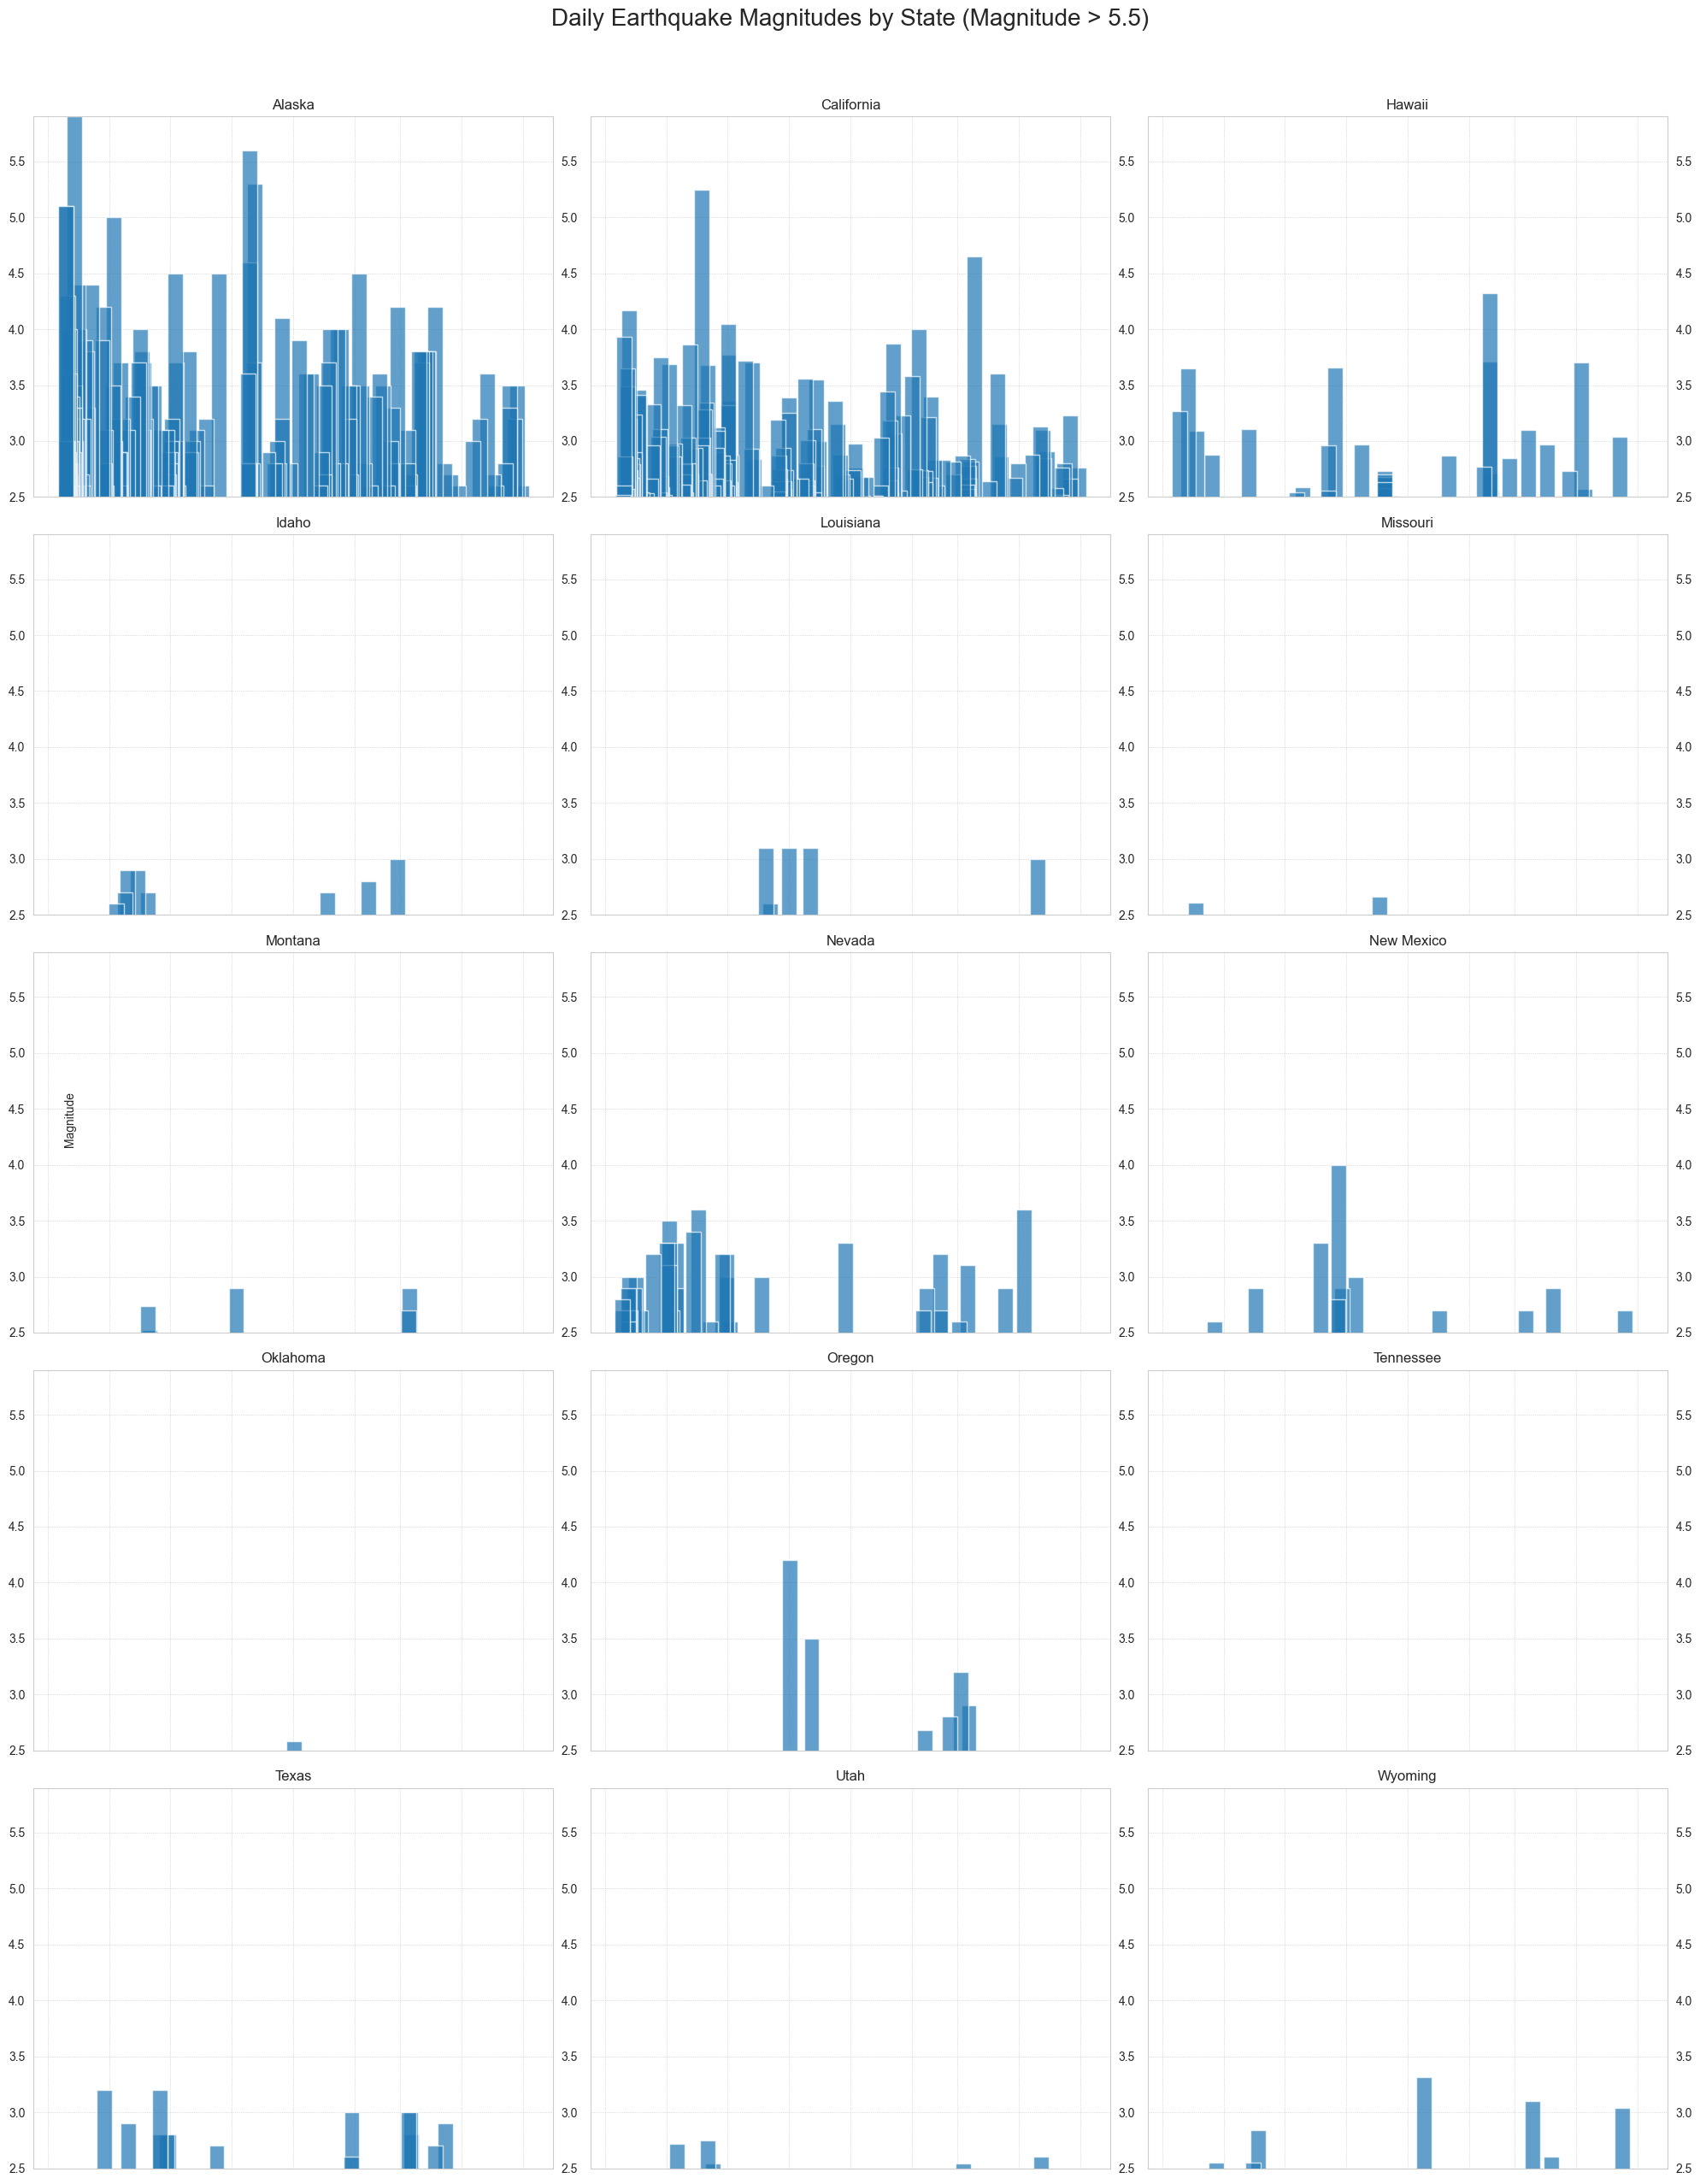

In [50]:
# This is a small multiple bar chart displaying daily average earthquakes per state with a magnitude over 2.5 in alphabetical order.

df = pd.read_csv('D:/TDA/Earthquake/USA_earthquakes_with_states2.csv')

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Filter for magnitudes above 2.5
df_filtered = df[df['mag'] > 2.5]

# Get unique states and sort them alphabetically, ensure Tennessee is included
states = sorted(set(df['State'].unique()) | {'Tennessee'})

# Calculate grid dimensions
cols = 3
rows = -(-len(states) // cols)  # Ceiling division

# Create the plot
fig, axes = plt.subplots(rows, cols, figsize=(20, 5*rows), sharex=True, sharey=True)
fig.suptitle('Daily Earthquake Magnitudes by State (Magnitude > 5.5)', fontsize=20, y=1.02)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot for each state
for i, state in enumerate(states):
    ax = axes[i]
    state_data = df_filtered[df_filtered['State'] == state]
    ax.bar(state_data['time'], state_data['mag'], width=1, alpha=0.7)
    ax.set_title(state)
    ax.set_xlabel('')
    ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    ax.tick_params(axis='x', rotation=45, labelbottom=False)  # Hide x-axis labels
    ax.tick_params(axis='y', labelright=True)  # Show y-axis labels on both sides
    ax.set_ylim(2.5, df_filtered['mag'].max())  # Set y-axis limit to start from 2.5
    ax.grid(True, which='both', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)  # Add grid

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Add a common y-axis label
fig.text(0.04, 0.5, 'Magnitude', va='center', rotation='vertical')

plt.tight_layout()
plt.savefig('D:/TDA/Earthquake/small_multiples_daily_earthquake_magnitudes_bar_above_2.5.png', dpi=300, bbox_inches='tight')
plt.show()

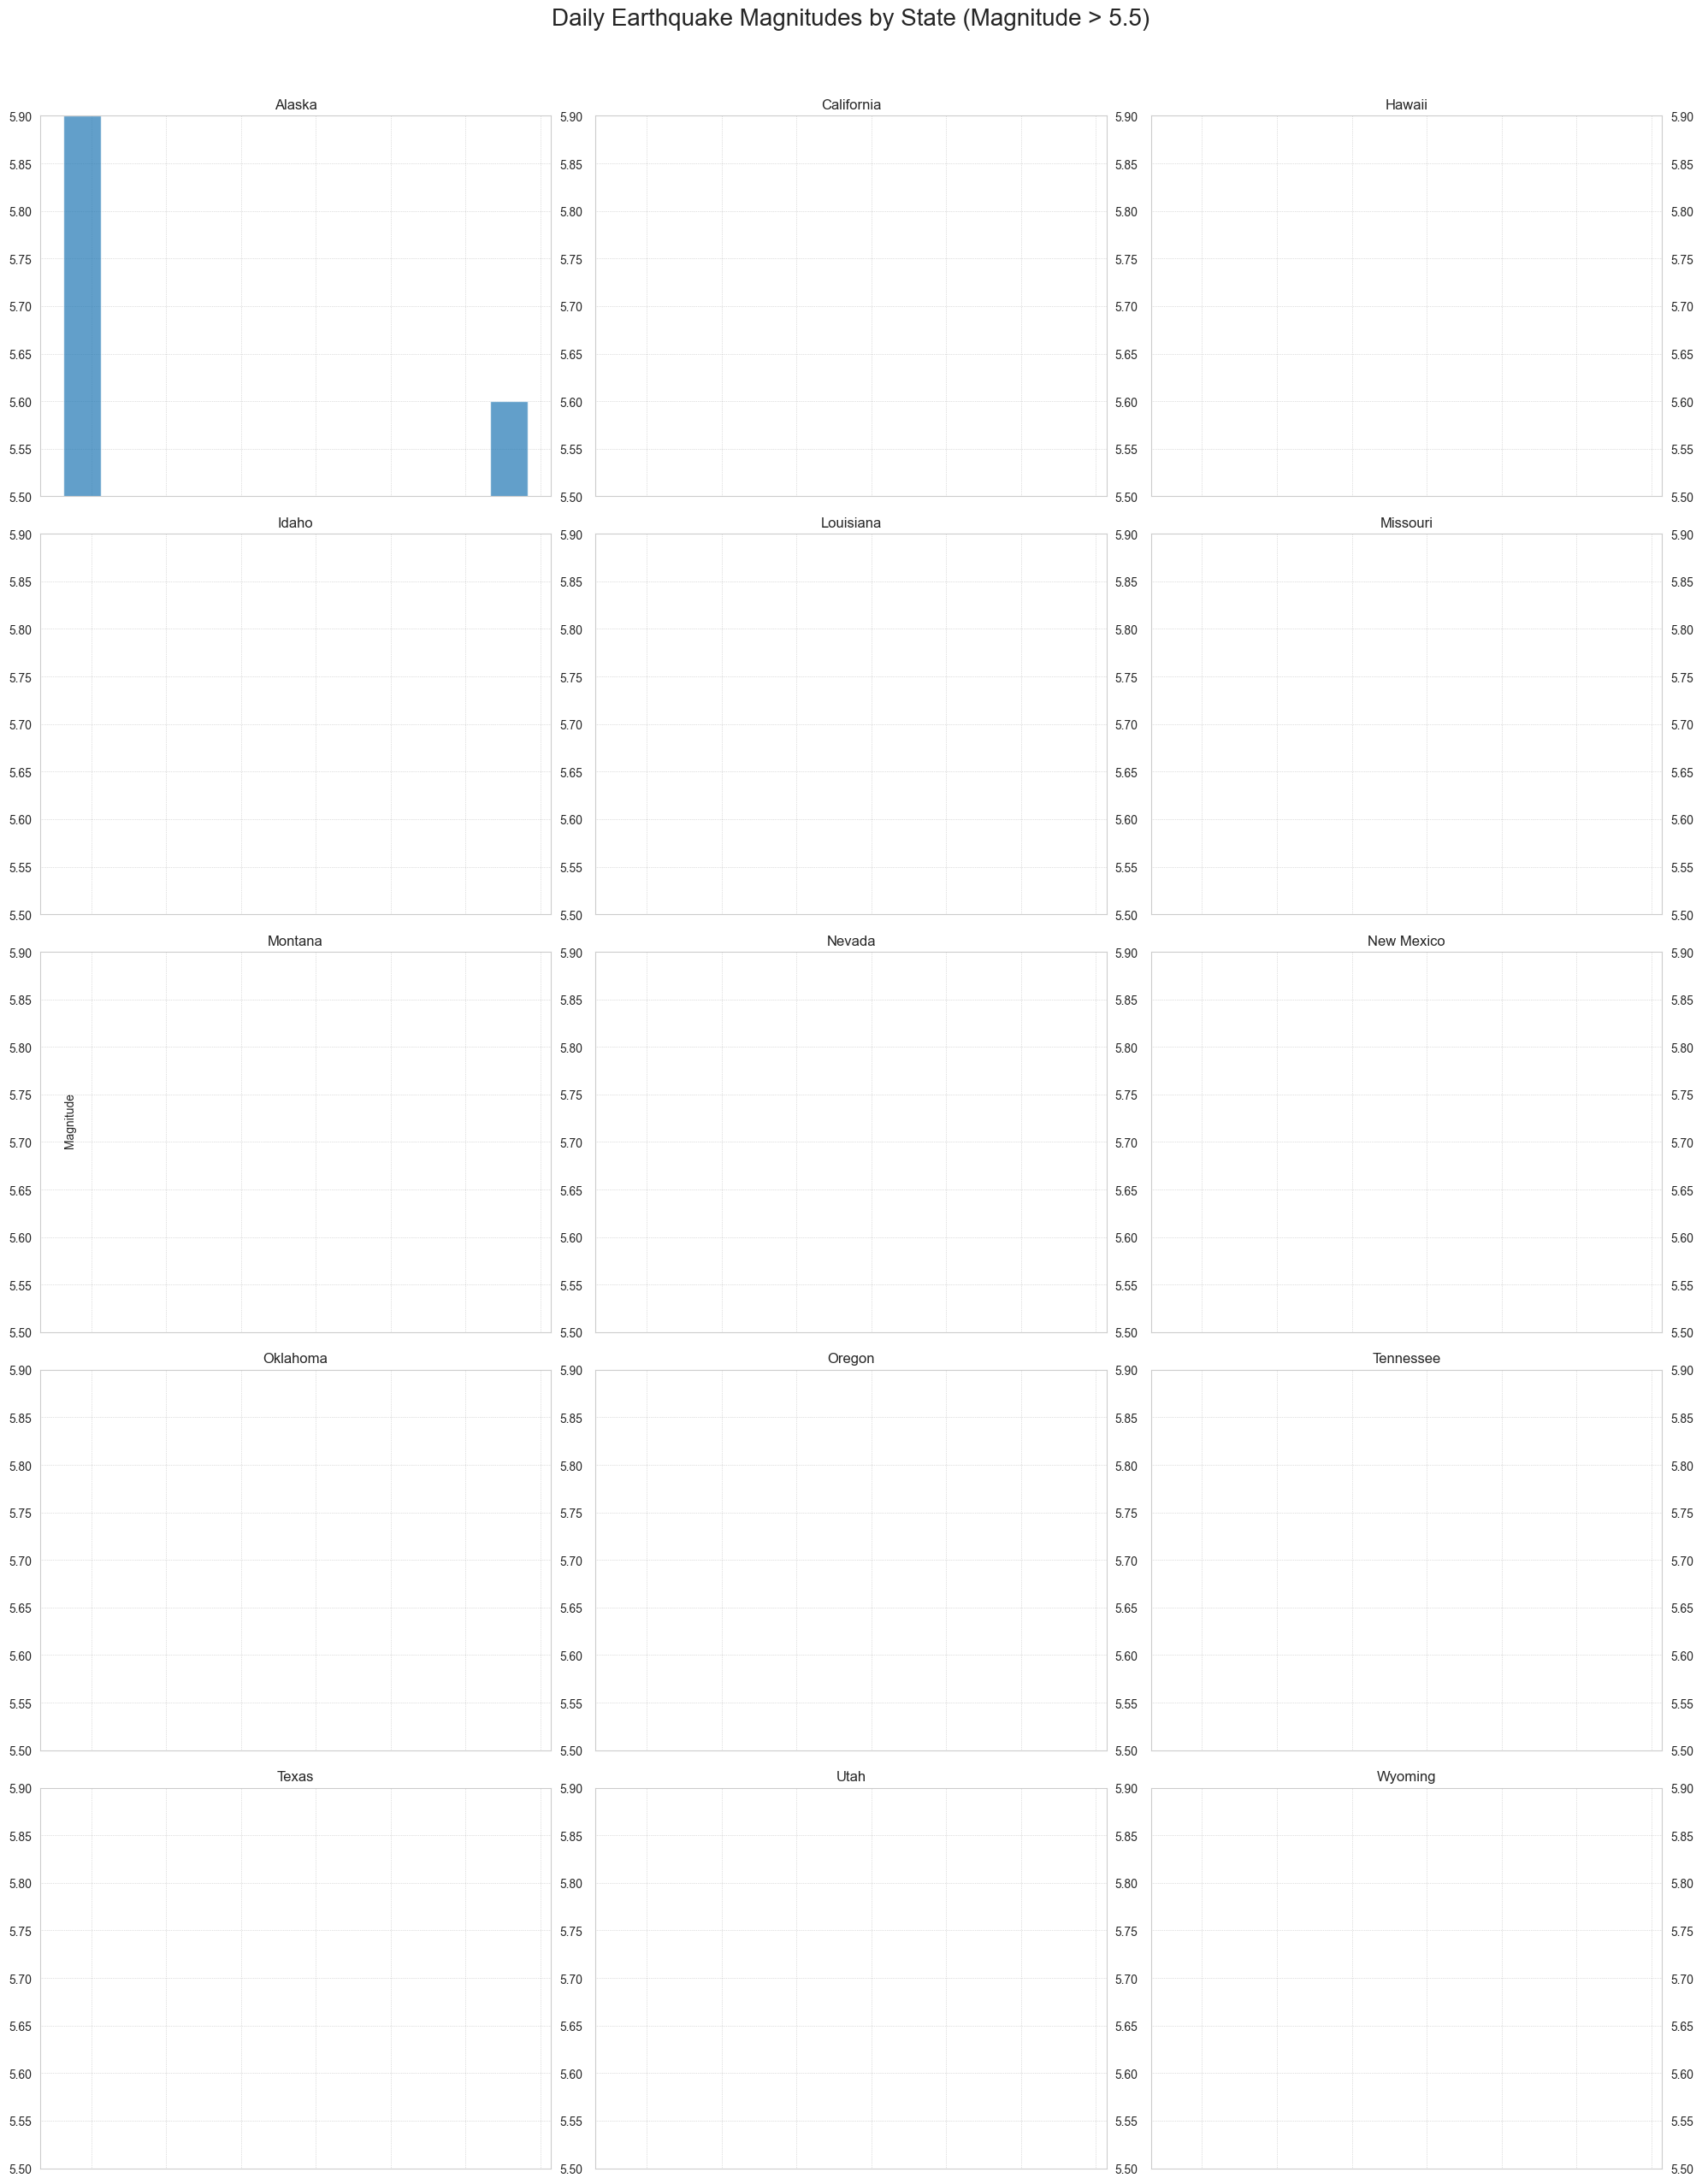

In [51]:
# This is a small multiple bar chart displaying daily average earthquakes per state with a magnitude over 5.5 in alphabetical order.


df = pd.read_csv('D:/TDA/Earthquake/USA_earthquakes_with_states2.csv')

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Filter for magnitudes above 5.5
df_filtered = df[df['mag'] > 5.5]

# Get unique states and sort them alphabetically, ensure Tennessee is included
states = sorted(set(df['State'].unique()) | {'Tennessee'})

# Calculate grid dimensions
cols = 3
rows = -(-len(states) // cols)  # Ceiling division

# Create the plot
fig, axes = plt.subplots(rows, cols, figsize=(20, 5*rows), sharex=True, sharey=True)
fig.suptitle('Daily Earthquake Magnitudes by State (Magnitude > 5.5)', fontsize=20, y=1.02)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot for each state
for i, state in enumerate(states):
    ax = axes[i]
    state_data = df_filtered[df_filtered['State'] == state]
    ax.bar(state_data['time'], state_data['mag'], width=1, alpha=0.7)
    ax.set_title(state)
    ax.set_xlabel('')
    ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    ax.tick_params(axis='x', rotation=45, labelbottom=False)  # Hide x-axis labels
    ax.tick_params(axis='y', labelright=True)  # Show y-axis labels on both sides
    ax.set_ylim(5.5, df_filtered['mag'].max())  # Set y-axis limit to start from 5.5
    ax.grid(True, which='both', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)  # Add grid

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Add a common y-axis label
fig.text(0.04, 0.5, 'Magnitude', va='center', rotation='vertical')

plt.tight_layout()
plt.savefig('D:/TDA/Earthquake/small_multiples_daily_earthquake_magnitudes_bar_above_5.5.png', dpi=300, bbox_inches='tight')
plt.show()

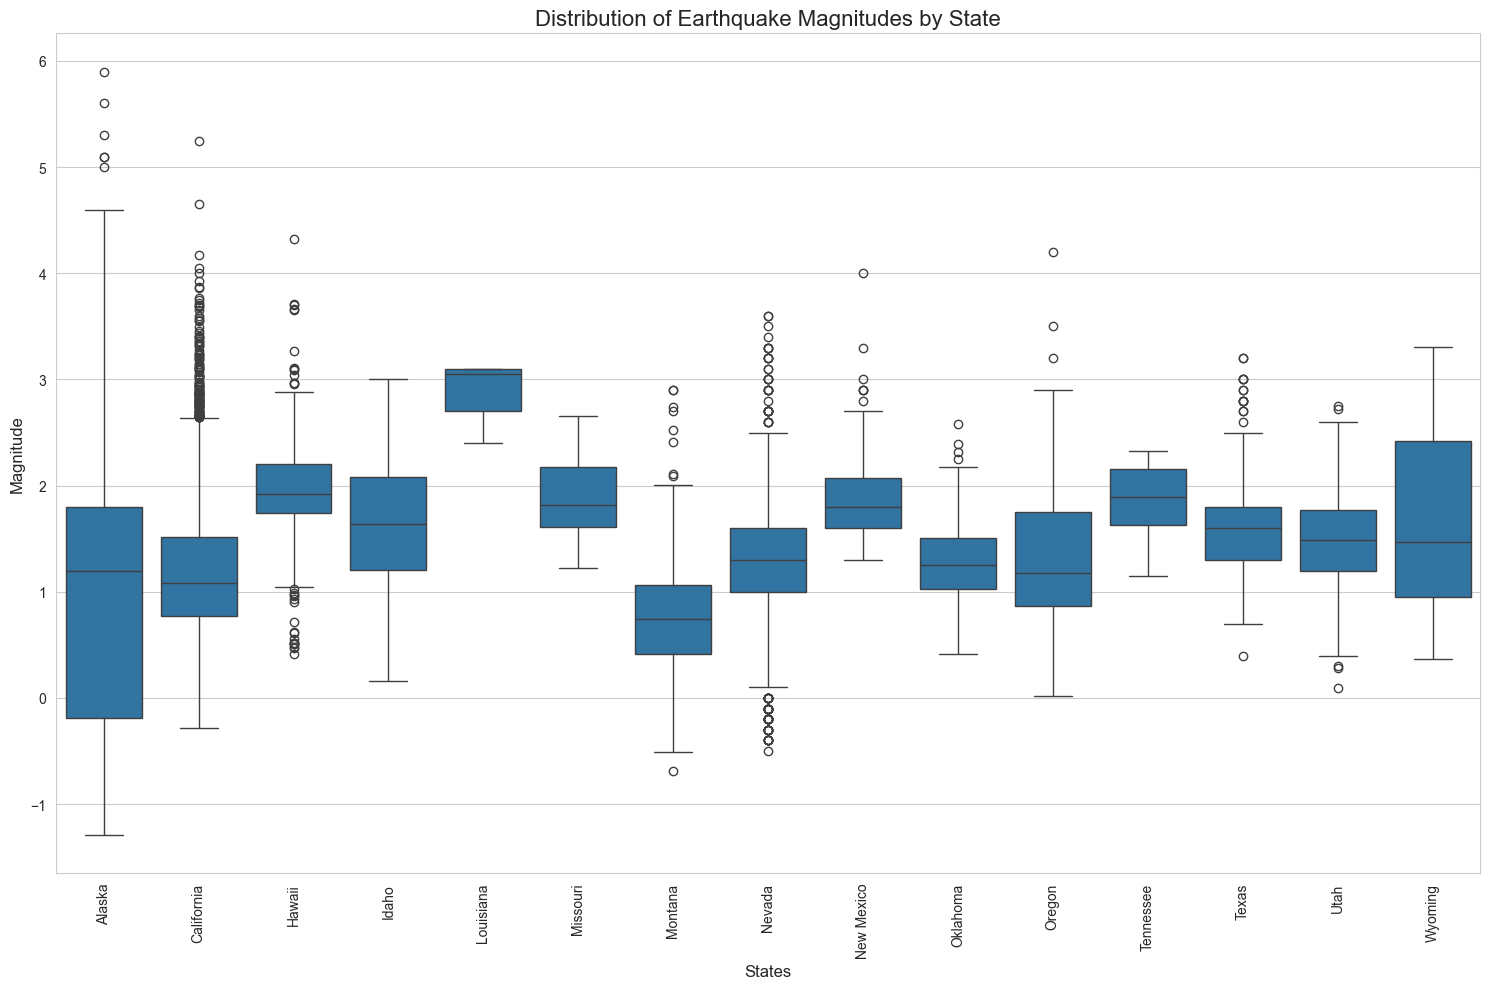

In [52]:
# This is a box plot showing all the outlier earthquakes by state, it was not  included in the presetation.


df = pd.read_csv('D:/TDA/Earthquake/USA_earthquakes_with_states2.csv')

# Sort states alphabetically
states = sorted(df['State'].unique())

# Create the plot
plt.figure(figsize=(15, 10))
sns.boxplot(x='State', y='mag', data=df, order=states)

# Customize the plot
plt.title('Distribution of Earthquake Magnitudes by State', fontsize=16)
plt.xlabel('States', fontsize=12)
plt.ylabel('Magnitude', fontsize=12)
plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig('D:/TDA/Earthquake/earthquake_magnitudes_boxplot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

d:\Python\lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
d:\Python\lib\site-packages\matplotlib\collections.py:1162: RuntimeWarning: invalid value encountered in sqrt
  size = np.sqrt(val)


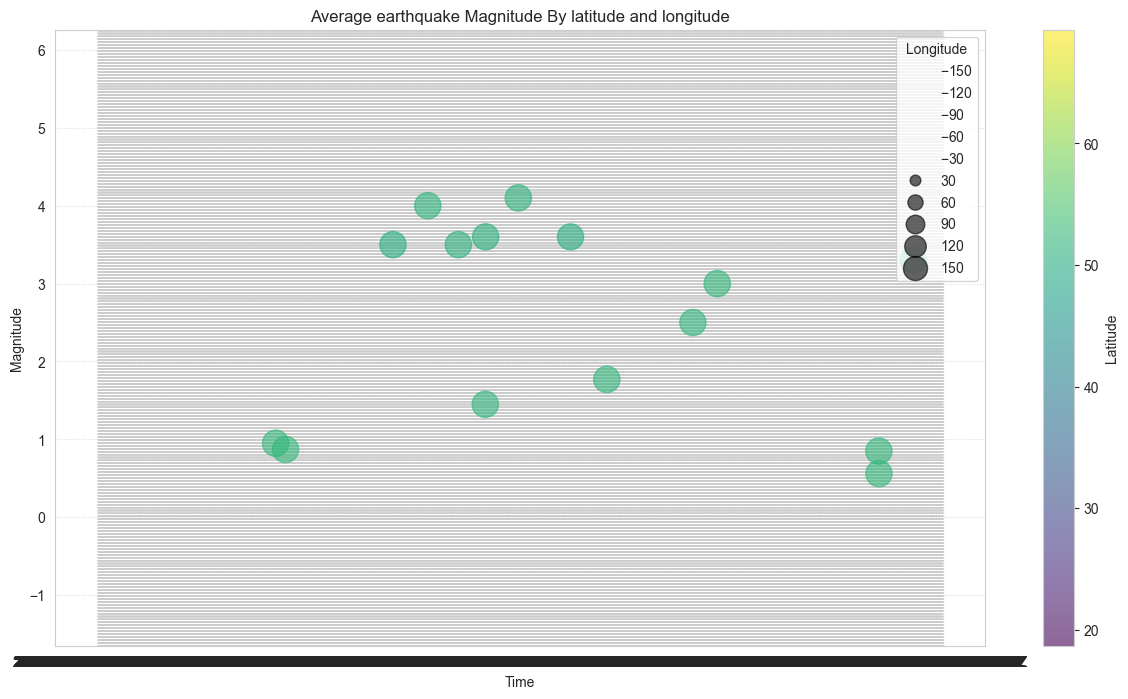

In [53]:
# This is a scatter chart that displays the distribution of earthquakes by latitude and longitude.

plt.figure(figsize=(15, 8))
scatter = plt.scatter(df['time'], df['mag'], 
                      c=df['latitude'], s=df['longitude']*2, 
                      cmap='viridis', alpha=0.6)

plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Average earthquake Magnitude By latitude and longitude')

# Add grid
plt.grid(True, linestyle=':', alpha=0.7)

# Add color bar for latitude
cbar = plt.colorbar(scatter)
cbar.set_label('Latitude')

# Add legend for longitude (size)
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6, 
                                          func=lambda s: s/2)
plt.legend(handles, labels, loc="upper right", title="Longitude")

plt.show()